In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Noiseless data gen

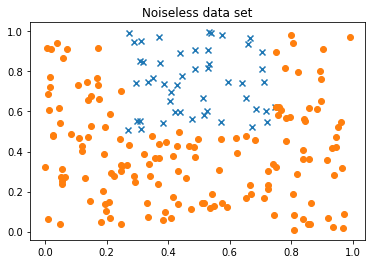

In [5]:
#making a data set
m = 200
X = np.random.random((m,2))


#
#0.25<x1 and x1 <0.75 and 0.5<x2
y = [1 if (0.25<x1 and x1 <0.75 and 0.5<x2) else 0 for (x1,x2) in X]
y = np.array(y)



#goup for visualizations
positives = np.array([x for (i,x) in enumerate(X) if y[i] == 1])
negatives = np.array([x for (i,x) in enumerate(X) if y[i] == 0])

#plot and show
fig,ax = plt.subplots(1)
ax.scatter(positives[:,0],positives[:,1],marker='x')
ax.scatter(negatives[:,0],negatives[:,1],marker='o')
ax.set_title('Noiseless data set')
plt.show()

## Add some noise

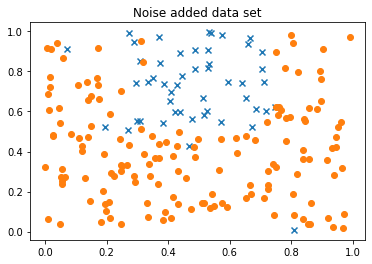

In [6]:
NOISE_PROP = 0.05 #random noise propotion-to-be-errors
noise_effected_data_point_indices = []
for i in range(len(y)):
    if np.random.random(1) < NOISE_PROP:
        y[i] = 1-y[i]
        noise_effected_data_point_indices.append(i)
        
        
#goup for visualizations
positives = np.array([x for (i,x) in enumerate(X) if y[i] == 1])
negatives = np.array([x for (i,x) in enumerate(X) if y[i] == 0])
        
#plot and show
fig,ax = plt.subplots(1)
ax.scatter(positives[:,0],positives[:,1],marker='x')
ax.scatter(negatives[:,0],negatives[:,1],marker='o')
ax.set_title('Noise added data set')
plt.show()

In [7]:
#coding the logistic regression
def sigmoid(t):return 1/(1 + np.exp(-t));

class LogisticRegression:
    def __init__(self,learning_rate=1.0e-1,n_iters=1_00_000):
        self.learning_rate=learning_rate
        self.n_iters=n_iters
        self.likelihood_history = []
    
    
    def fit(self,x_train,y_train):
        self.n_features = x_train.shape[1]
        self.w = np.zeros(self.n_features)
        self.b = 0
        m = x_train.shape[0]
        
        for _ in range(self.n_iters):
            
            f_wb = sigmoid(x_train@self.w + self.b) #vector
            likelihood = np.sum(y_train * np.log(f_wb) + (1 - y_train) * np.log(1 - f_wb))
            self.likelihood_history.append(likelihood)
            
            for j in range(self.n_features):
                self.w[j] += (1/m) * self.learning_rate * np.dot((y_train - f_wb),x_train[:,j]).sum()
            self.b += (1/m) * self.learning_rate * (y_train - f_wb).sum()
        
    def predict(self,X_test):
        f_wb = sigmoid(X_test@self.w + self.b) #vector
        pred = np.array(f_wb>0.5).astype(np.int16)
        return pred
    
    def coef(self):
        print(self.w)
        print(self.b)
        
    def llh(self):
        #print(self.likelihood_history)
        
        fig,ax = plt.subplots(1)
        ax.plot(self.likelihood_history)
        plt.show()


In [8]:

# print(y)


###train
# feature eng : need squared terms to identify a two sided boundary
X_squred = X**2
X = np.hstack((X,X_squred))

myLogReg = LogisticRegression(n_iters=1_00_000)
myLogReg.fit(X,y)


#test :: check accuracy
y_preds = myLogReg.predict(X)

accuracy = np.int16(y_preds == y).sum() / y.shape[0]
print("Accuracy: " ,accuracy)


Accuracy:  0.91


In [52]:
# y_preds


[ 22.30142896  10.38889447 -23.10757083  -3.01842879]
-9.977311638404194


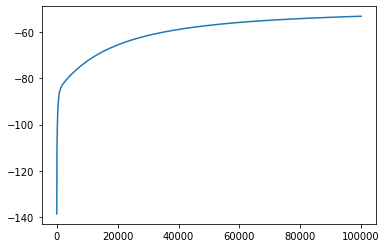

In [9]:
myLogReg.coef()
myLogReg.llh()

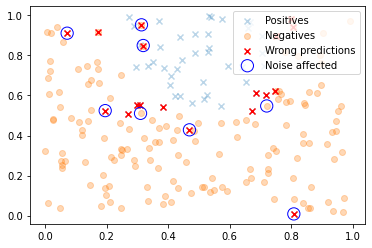

In [10]:
#looking at the data points wrongly predicted

wrongs = y != y_preds
X_of_wrong_preds = X[wrongs]
X_of_noise_effected = X[noise_effected_data_point_indices]
len(X_of_wrong_preds)


#plot and show
fig,ax = plt.subplots(1)
ax.scatter(positives[:,0],positives[:,1],marker='x',alpha=0.3,label='Positives')
ax.scatter(negatives[:,0],negatives[:,1],marker='o',alpha=0.3,label='Negatives')


ax.scatter(X_of_wrong_preds[:,0],X_of_wrong_preds[:,1],marker='x',color='red',label='Wrong predictions')
ax.scatter(X_of_noise_effected[:,0],X_of_noise_effected[:,1],marker='o',
           label='Noise affected',s=150,facecolor='none',edgecolors='blue')

plt.legend()
plt.show()

<font color='red'>
    <b>The results are fascinating. Important observations:<br/></b>
    <ul>
    <li> Prediction errors are near to the boundary</li>
    <li> The noise affected data points are grouped to the correct category! <br/>
    (The data points with blue border are not really wrong predictions. Problem is in the data set!)</li>
    </ul>
 </font>